 # 1. kisházi
 Kozák Áron (TJ4FMC)
 -- BME GPK Mechatronika Bsc
 1. Python nyelven olvass be öt darab tetszőleges 256x256 pixeles színes képet, jelenítsd meg és jelenítsd meg külön az R, G és B csatornák értékeit hisztogramon. (4p)
 2. Csatornánként számold ki a pixelek átlagát és szórását minden képre, majd alakítsd át ezeket 0 várható értékű, 1 szórású adathalmazzá. Ezt követően ellenőrizd a kapott adathalmaz várható értékét és szórását. (4p)
 3. Olvass be két tetszőleges hangfájlt és jelenítsd meg ezek spektrogramját. (4p)
 4. Alakítsd át a spektogramokat 0 várható értékű és 1 szorású adathalmazzá. Ezt követően ellenőrizd a kapott adathalmaz várható értékét és szórását. (4p)
 5. Python scriptből töltsd le a http://smartlab.tmit.bme.hu/oktatas-deep-learning oldal szöveges tartalmát, jelenítsd meg a szöveges tartalmat, továbbá hisztogramon jelenítsd meg a tartalomban a betűk előfordulásának gyakoriságát. (4p)

In [8]:
# Import some libraries to work with:

import numpy as np  
import matplotlib.pylab as plt    
from PIL import Image   #to open and process images 
import requests   #to download from internet
import scipy.io.wavfile as wavfile   #to work with .wav files
from bs4 import BeautifulSoup   #to format html code into text

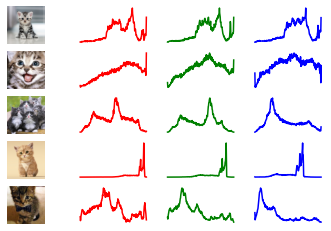

In [9]:
## 1st task

urls = [
    "https://avatarfiles.alphacoders.com/182/182910.jpg", 
    "https://pbs.twimg.com/profile_images/664169149002874880/z1fmxo00_400x400.jpg",
    "https://news.artnet.com/app/news-upload/2015/08/ultimate-kitties-3-e1439483205813-256x256.jpg",
    "https://avatarfiles.alphacoders.com/124/124420.jpg",
    "https://i.pinimg.com/474x/b5/e1/be/b5e1bef76b2058910f556c85c1040b79.jpg"
]   #links to images

#Below I load the images, then put them into images[], their 3 rgb histograms to histograms[], and I plot them on a 5x4 subplot

fig, ax = plt.subplots(len(urls), 4)
images = []
histograms = []

for i in range(len(urls)):
    images.append( Image.open(requests.get(urls[i], stream=True).raw) ) #load image from link
    ax[i, 0].imshow(images[i]) #show image
    ax[i, 0].set_axis_off() #switch off axises for better visibility
    ax[i, 1].set_axis_off()
    ax[i, 2].set_axis_off()
    ax[i, 3].set_axis_off()
    histograms.append( images[i].histogram() ) #make histograms
    ax[i, 1].plot(histograms[i][0:256], color='red') #plot histograms
    ax[i, 2].plot(histograms[i][256:512], color='green')
    ax[i, 3].plot(histograms[i][512:768], color='blue')

plt.show()

In [10]:
## 2nd task

# calculates avarage of array with av = sum(elements) / number_of_elements
# array is 3D, 2D for pixels, 1D is for color chanels
# it returns with an av[3] array containing avarages for all chanels seperate
def imageAvarage(array):
    av = np.zeros(3)
    for x in range(len(array)):
        for y in range(len(array[1])):
            av += array[x][y]
    av /= len(array) * len(array[1])
    return av

# calculates standard deviation of array with sd = sqrt( sum( (av-element)^2 ) / number_of_elements )   
# it returns with an av[3] array containing standard deviations for all chanels seperate
def imageStandardDeviation(array, av):
    sd = np.zeros(3)
    for x in range(len(array)):
        for y in range(len(array[1])):
            sd += (av - array[x][y]) ** 2
    sd /= len(array) * len(array[1]) - 1
    sd = sd ** 0.5
    return sd

# normalizes array with normalized_element = (element - av) / sd
# returns with a normalized array
def imageNormalize(array):
    av = imageAvarage(array)
    sd = imageStandardDeviation(array, av)
    normalized = np.zeros((len(array), len(array[1]), 3))
    for x in range(len(array)):
        for y in range(len(array[1])):
            normalized[x][y] = (array[x][y] - av) / sd
    return normalized

# prints the avarage and standard deviations of the input array's color chanels
def printData(array, num = 0):
    av = imageAvarage(array)
    sd = imageStandardDeviation(array, av)
    print(num, '. image:\n\t',
          'red =', av[0], '+/-', sd[0], '\n\t',
          'green =', av[1], '+/-', sd[1], '\n\t',
          'blue =', av[2], '+/-', sd[2],
         )

# Below I transform the images into arrays, and put them into arrays[]. Then I print their data, normalize them, and print it again
arrays = []
normalizeds = []
for i in range(len(urls)):
    arrays.append( np.asarray(images[i]) ) #change image to array
    printData(arrays[i], i+1) #print data
    normalizeds.append( imageNormalize(arrays[i]) ) #normalize array

print('After normalization: ')
for i in range(len(urls)):
    printData(normalizeds[i], i+1) #print normalized array's data (should be 0 +/- 1)

1 . image:
	 red = 160.52682495117188 +/- 48.26318150485454 
	 green = 161.50802612304688 +/- 47.935429945804515 
	 blue = 161.70472717285156 +/- 47.443793857332125
2 . image:
	 red = 157.35726928710938 +/- 60.714348414631374 
	 green = 143.984130859375 +/- 62.119992752712605 
	 blue = 140.06825256347656 +/- 65.10760285662913
3 . image:
	 red = 125.92153930664062 +/- 56.58347739959467 
	 green = 125.98236083984375 +/- 57.27131191014762 
	 blue = 112.74557495117188 +/- 60.68356372851699
4 . image:
	 red = 219.10543823242188 +/- 34.098025683107814 
	 green = 190.28077697753906 +/- 41.18099591682611 
	 blue = 150.70025634765625 +/- 39.96468835720779
5 . image:
	 red = 115.10552978515625 +/- 65.10884246040344 
	 green = 94.11135864257812 +/- 63.219566775836434 
	 blue = 70.84217834472656 +/- 61.987097234483976
After normalization: 
1 . image:
	 red = -2.0324758857274278e-15 +/- 1.0000000000002034 
	 green = 3.3913301854260336e-15 +/- 0.9999999999995904 
	 blue = -5.510013696393215e-15 +/- 

C:\Users\Aron\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7558: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


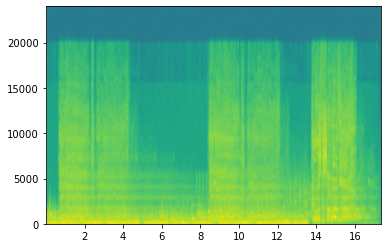

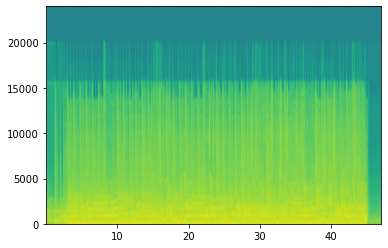

In [11]:
## 3rd task

# load audio files from file 
Fs1, aud1 = wavfile.read('Summer of Love (sample).wav') #Fs is sample rate, aud1 is the voice data
Fs2, aud2 = wavfile.read('Wonder (sample).wav')
aud1 = aud1[:, 0] #I need only left voice chanel
aud2 = aud2[:, 0]

# draw spectrograms:
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud1, Fs=Fs1)
plt.show()
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud2, Fs=Fs2)
plt.show()

In [12]:
## 4th task (not sure if that's what you meant)

# calculates avarage of 1D array with av = sum(elements) / number_of_elements
def soundAvarage(array):
    av = 0
    for i in array:
        av += i
    av /= len(array)
    return av

# calculates standard deviation of 1D array with sd = sqrt( sum( (av-element)^2 ) / number_of_elements ) 
def soundStandardDeviation(array):
    av = soundAvarage(array)
    sd = 0
    for i in array:
        sd += (av - i) ** 2
    sd /= len(array)
    sd = sd ** 0.5
    return sd

# normalizes 1D array with normalized_element = (element - av) / sd
def soundNormalize(array):
    av = soundAvarage(array)
    sd = soundStandardDeviation(array)
    normalized = np.zeros(len(array))
    for i in range(len(array)):
        normalized[i] = (array[i] - av) / sd
    return normalized

# print both audio files' data:
print('Audio 1:\n\t',
      'sample rate:', Fs1, '\n\t',
      'length:', len(aud1) / Fs1, 'sec\n\t',
      'avarage:', soundAvarage(aud1), '\n\t',
      'standard deviation:', soundStandardDeviation(aud1)
     )
print('Audio 2:\n\t',
      'sample rate:', Fs2, '\n\t',
      'length:', len(aud2) / Fs2, 'sec\n\t',
      'avarage:', soundAvarage(aud2), '\n\t',
      'standard deviation:', soundStandardDeviation(aud2)
     )

# normalize audio files:
print('\nAfter Normalization:')
naud1 = soundNormalize(aud1)
naud2 = soundNormalize(aud2)

# and print changed data again:
print('Audio 1:\n\t',
      'avarage:', soundAvarage(naud1), '\n\t',
      'standard deviation:', soundStandardDeviation(naud1)
     )
print('Audio 2:\n\t',
      'avarage:', soundAvarage(naud2), '\n\t',
      'standard deviation:', soundStandardDeviation(naud2)
     )

Audio 1:
	 sample rate: 48000 
	 length: 17.356916666666667 sec
	 avarage: 1.6245000792191393 
	 standard deviation: 6509.989876624882
Audio 2:
	 sample rate: 48000 
	 length: 46.95075 sec
	 avarage: -0.23058825826353502 
	 standard deviation: 5796.132851884971

After Normalization:
Audio 1:
	 avarage: 1.5529642951257644e-17 
	 standard deviation: 0.9999999999999889
Audio 2:
	 avarage: 3.117562600685898e-18 
	 standard deviation: 1.000000000000035


In [15]:
## 5th task

# Let's load the text:
url = 'http://smartlab.tmit.bme.hu/oktatas-deep-learning'
web = requests.get(url, allow_redirects=True)
uglyHtml = web.content
niceHtml = BeautifulSoup(uglyHtml, 'html.parser')
Text = niceHtml.get_text()
text = Text.lower() #change capital letters to count them

# I use letters[] to store hungarian abc's one digit letters in an array, and counts[] to store their frequency
letters = ['a', 'á', 'b', 'c', 'd', 'e', 'é', 'f', 'g', 'h', 'i', 'í', 'j', 'k', 'l', 'm', 'n', 'o', 'ó', 'ö', 'ő', 'p', 'q', 'r', 's', 't', 'u', 'ú', 'ü', 'ű', 'v', 'w', 'x', 'y', 'z']
counts = np.zeros(len(letters) + 1)

# count the letters:
for t in text: #goes trought all char of text
    specialCharacter = True
    for i in range(len(letters)): #find which element of letters[] is the current char
        if t == letters[i]:
            counts[i] += 1
            specialCharacter = False
            break
    if specialCharacter: #the default will be "other characters", stored in counts[-1]
        counts[len(letters)] += 1

# draw a sideway histogram from ascii characters, so you can see the letter and it's frequency next to the corresponding row        
maximum = max(counts[0:-1])
histogramLength = 60
for i in range(len(letters)):
    num = round(histogramLength*counts[i] / maximum) # number of '#'s in row
    graph = ''
    for j in range(num):
        graph += '#'
    for j in range(histogramLength-num+3):
        graph += ' '
    print(letters[i] + '|' + graph, int(counts[i]))
print('other characters:   ', int(counts[-1]))

# and print the text itself:
print(Text) #it's long, that's why the histogram is first

a|##########################################################      1244
á|#####################                                           442
b|############                                                    247
c|######                                                          124
d|#################                                               366
e|############################################################    1285
é|#################                                               354
f|########                                                        164
g|######################                                          464
h|###########                                                     231
i|###########################                                     571
í|###                                                             58
j|#######                                                         144
k|############################                                    597
l|#################